<a href="https://colab.research.google.com/github/Ucchwas/Arrhythmia-on-ECG-Classification-using-CNN/blob/main/Arrhythmia_on_ECG_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Datasets/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/MyDrive/Datasets/mitbih_test.csv',header=None)

In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


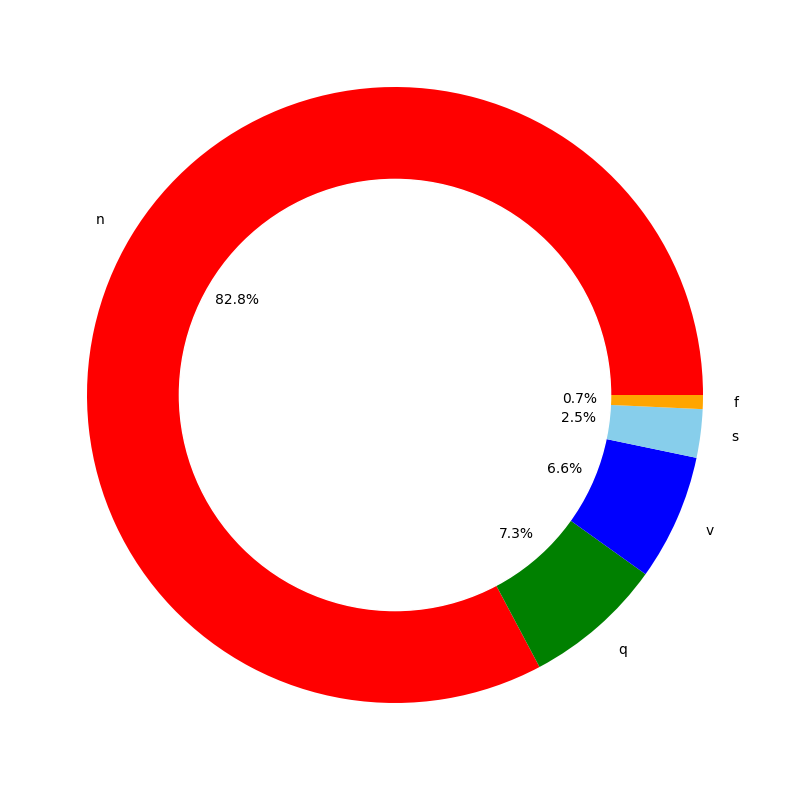

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


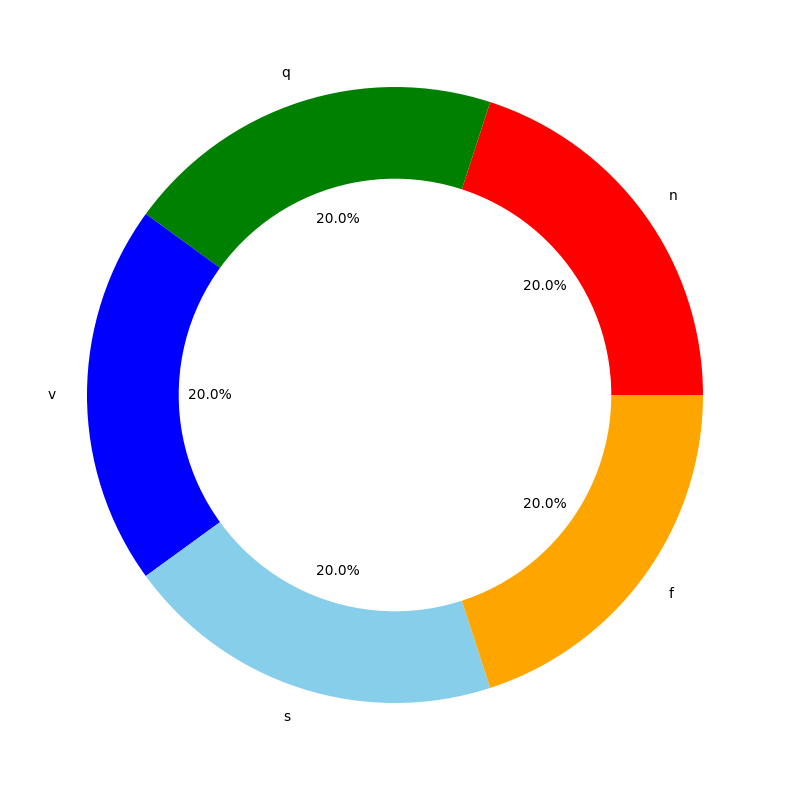

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
18112,1.000000,0.837713,0.485317,0.171561,0.000000,0.064915,0.137558,0.122102,0.097372,0.098918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73530,0.896040,0.772277,0.056931,0.000000,0.143564,0.173267,0.178218,0.170792,0.160891,0.146040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
79374,0.000000,0.062606,0.150592,0.203046,0.223350,0.228426,0.258883,0.291032,0.306261,0.302876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80515,1.000000,0.782828,0.370370,0.223906,0.168350,0.163300,0.141414,0.132997,0.129630,0.127946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
85250,0.950203,0.905488,0.846545,0.780488,0.692073,0.586382,0.458333,0.350610,0.277439,0.228659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


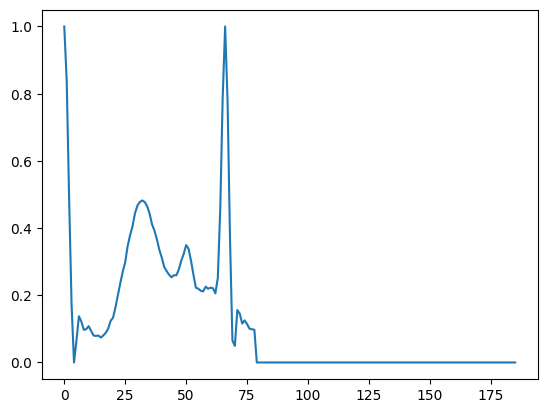

In [ ]:
plt.plot(c.iloc[0,:186])

In [ ]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

In [ ]:
plot_hist(0,70,5,65)

In [ ]:
plt.plot(c.iloc[1,:186])

In [ ]:
plot_hist(1,50,5,45) 

In [ ]:
plt.plot(c.iloc[2,:186])

900000
900000


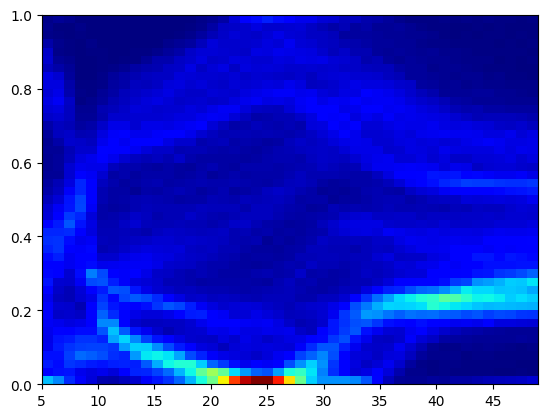

In [ ]:
plot_hist(2,50,5,45)

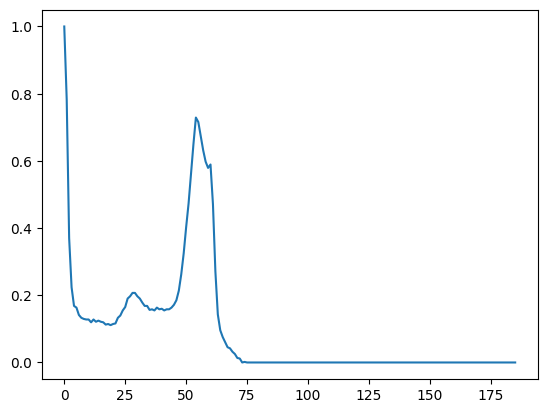

In [ ]:
plt.plot(c.iloc[3,:186])

900000
900000


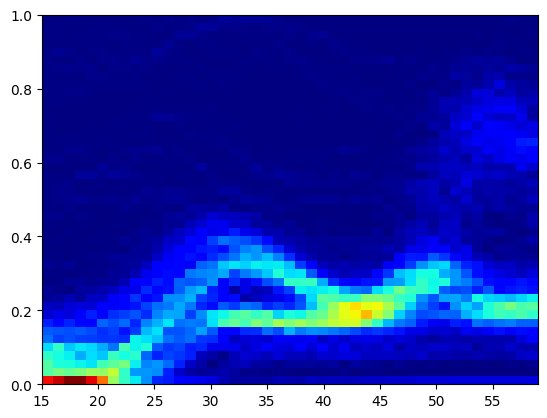

In [ ]:
plot_hist(3,60,15,45)

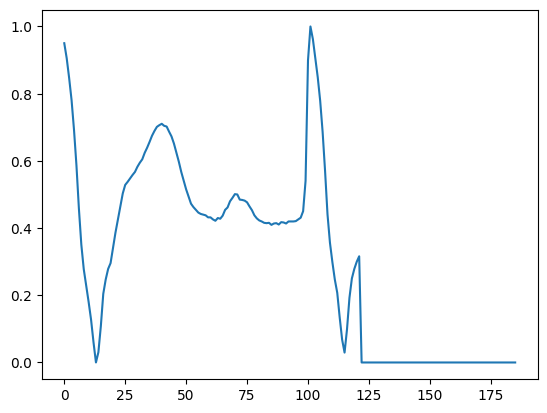

In [ ]:
plt.plot(c.iloc[4,:186])

700000
700000


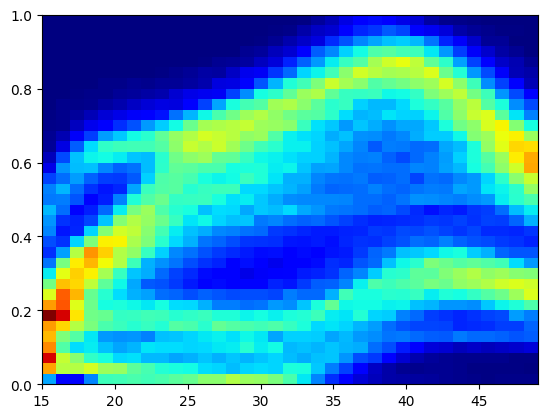

In [ ]:
plot_hist(4,50,15,35)

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

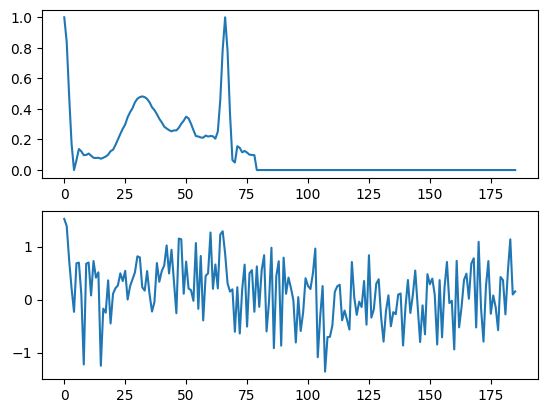

In [ ]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 129s 40ms/step - loss: 0.9008 - accuracy: 0.6529 - val_loss: 0.9927 - val_accuracy: 0.6035
Epoch 2/40
3125/3125 [==============================] - 125s 40ms/step - loss: 0.7974 - accuracy: 0.6972 - val_loss: 0.8180 - val_accuracy: 0.6681
Epoch 3/40
3125/3125 [==============================] - 125s 40ms/step - loss: 0.7625 - accuracy: 0.7093 - val_loss: 1.0712 - val_accuracy: 0.5105
Epoch 4/40
3125/3125 [==============================] - 125s 40ms/step - loss: 0.7361 - accuracy: 0.7199 - val_loss: 1.0797 - val_accuracy: 0.5529
Epoch 5/40
3125/3125 [==============================] - 136s 43ms/step - loss: 0.7100 - accuracy: 0.7300 - val_loss: 0.8838 - val_accuracy: 0.6606
Epoch 6/40
3125/3125 [==============================] - 126s 40ms/step - loss: 0.6830 - accuracy: 0.7405 - val_loss: 1.0017 - val_accuracy: 0.5964
Epoch 7/40
3125/3125 [==============================] - 132s 42ms/step - loss: 0.6589 - accuracy: 0.7497 - val_loss: 0

In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


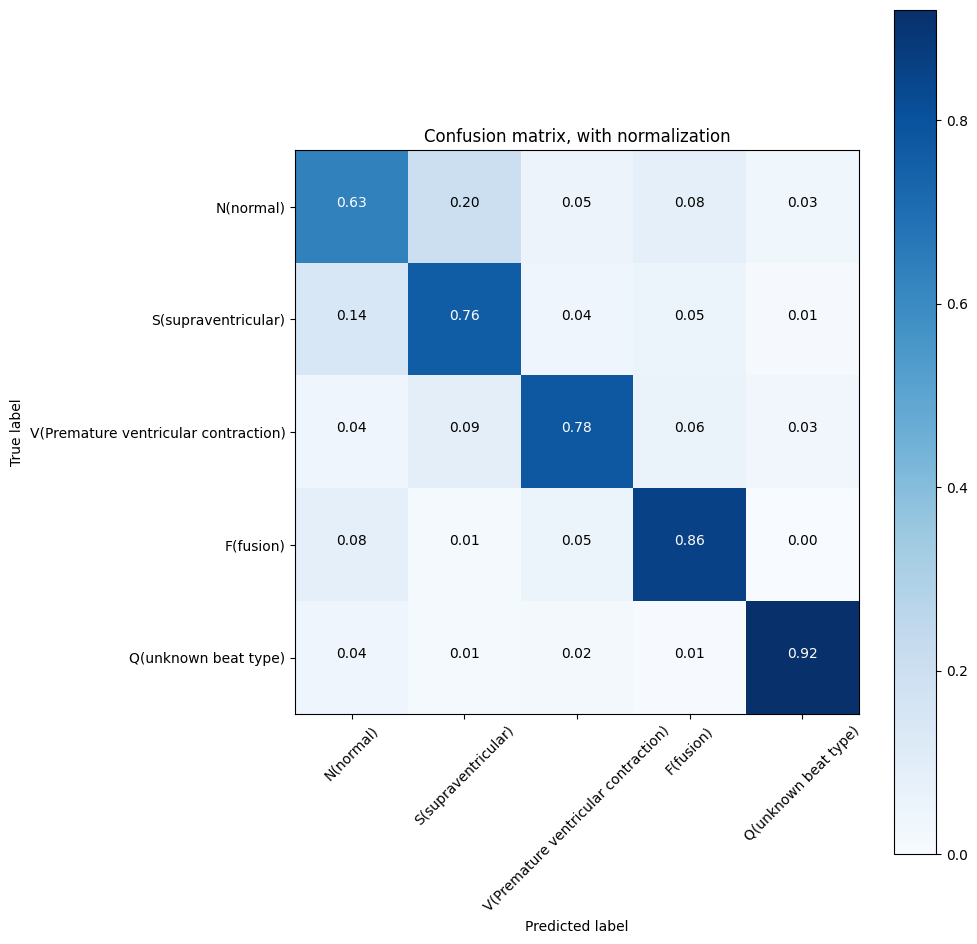

In [74]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N(normal)', 'S(supraventricular)', 'V(Premature ventricular contraction)', 'F(fusion)', 'Q(unknown beat type)'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [ ]:
import tensorflow as tf

# Load the model
best_model = tf.keras.models.load_model("best_model.h5")

In [ ]:
# convert to tensorflow lite model
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()
open("Arrhythmia on_ECG_Classification.tflite", "wb").write(tflite_model)